Chapter 15

# SVD分解性质
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码实现了矩阵的奇异值分解（SVD）并通过图形展示分解结果和相关性质，特别是$U$和$V$矩阵的正交性和单一奇异值投影的效果。

### 主要步骤
1. **奇异值分解函数 $svd(X)$**：  
   这个函数接收一个矩阵$X$，计算其SVD分解，即$X = U S V^T$。其中：
   - $U$是左奇异矩阵，由$X X^T$的特征向量组成；
   - $S$是奇异值构成的对角矩阵，包含非负的奇异值$s_i$；
   - $V^T$是右奇异矩阵的转置，由$X^T X$的特征向量组成。
   
   具体实现中，通过`numpy`的`np.linalg.svd`函数得到$U, s, V^T$，其中$s$为奇异值向量。然后，根据是否使用完整矩阵形式构造对角矩阵$S$，并将奇异值进行舍入处理。

2. **可视化SVD分解 $visualize\_svd(X)$**：  
   该函数调用$svd(X)$分解得到的$U, S, V$，并将$X, U, S, V^T$以热力图的形式进行可视化。图形展示了矩阵的结构和数值分布，使用的颜色映射范围固定在$[-6, 6]$。在可视化过程中，每个矩阵都用特定标签标注（如$X, U, S, V^T$），并将这些矩阵的单一图像呈现排列成一行。

3. **验证矩阵正交性**：
   - **$U \times U^T = I$**：验证$U$矩阵的正交性，即$U$与其转置相乘应等于单位矩阵$I$。代码通过热力图展示$U, U^T$及$U \times U^T$，其中$I$为单位矩阵。
   - **$V \times V^T = I$**：类似地，验证$V$矩阵的正交性，即$V$与其转置相乘等于单位矩阵$I$。同样使用热力图展示$V, V^T$及$V \times V^T$。

4. **奇异值矩阵分析**：  
   通过热力图展示单个奇异值的投影效果，即$s_i u_i v_i^T$，其中：
   - $s_i$是$S$中的奇异值；
   - $u_i$和$v_i$分别是$U$和$V$的第$i$列向量。
   
   展示的每个热力图对应于$$s_i u_i v_i^T$$，其中$i$取值$1$到$4$，展示了该奇异值及其相关向量对矩阵的单项影响。

5. **投影展示**：  
   逐项展示每个奇异值与其对应的左、右奇异向量的投影效果，即展示矩阵$X$在向量$v_i$和$u_i$方向上的投影。具体地，对每个奇异值$s_i$，将其与对应的$v_i$和$u_i$构成的投影$$X_j = s_i u_i v_i^T$$展示出来。

该代码的核心在于对SVD的分解过程和性质进行细致地展示，同时结合热力图展现矩阵结构，帮助理解SVD分解如何将矩阵分解为由特定方向和尺度控制的子矩阵的组合形式。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于数值计算
from matplotlib import pyplot as plt  # 导入Matplotlib库用于绘图
plt.rcParams['image.cmap'] = 'RdBu_r'  # 设置全局色彩映射为 'RdBu_r'
import seaborn as sns  # 导入Seaborn库用于增强绘图效果
PRECISION = 3  # 设置显示精度为小数点后三位

## 定义SVD函数

In [2]:
def svd(X):
    """
    执行矩阵X的奇异值分解（SVD），并对奇异值进行舍入。
    参数：
    - X: 输入矩阵
    返回：
    - U, S, Vt: 舍入后的U矩阵、奇异值矩阵S和转置的V矩阵
    """
    full_matrices = True  # 是否使用完整矩阵
    U, s, Vt = np.linalg.svd(X, full_matrices=full_matrices)  # 计算X的SVD分解

    if full_matrices:
        S = np.zeros(X.shape)  # 创建与X形状相同的零矩阵
        np.fill_diagonal(S, s)  # 将奇异值填入对角线
    else:
        S = np.diag(s)  # 将奇异值存入对角矩阵

    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)  # 舍入返回U、S和转置的V矩阵

## 定义可视化SVD结果的函数

In [3]:
def visualize_svd(X, title_X, title_U, title_S, title_V, fig_height=5):
    """
    可视化SVD分解结果。
    参数：
    - X: 原始矩阵
    - title_X, title_U, title_S, title_V: 各个矩阵的标题
    - fig_height: 图形高度
    返回：
    - X, U, S, V: 输入矩阵和分解得到的矩阵
    """
    U, S, V = svd(X)  # 调用SVD函数进行分解
    
    all_ = np.r_[X.flatten(order='C'), U.flatten(order='C'), S.flatten(order='C'), V.flatten(order='C')]  # 获取所有矩阵元素
    all_max = 6  # 设置最大值
    all_min = -6  # 设置最小值
    
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))  # 创建图表

    plt.sca(axs[0])
    ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制原始矩阵
    ax.set_aspect("equal")
    plt.title(title_X)

    plt.sca(axs[1])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[2])
    ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U矩阵
    ax.set_aspect("equal")
    plt.title(title_U)

    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[4])
    ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制S矩阵
    ax.set_aspect("equal")
    plt.title(title_S)

    plt.sca(axs[5])
    plt.title('@')
    plt.axis('off')

    plt.sca(axs[6])
    ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制转置的V矩阵
    ax.set_aspect("equal")
    plt.title(title_V)

    return X, U, S, V  # 返回所有矩阵

## 设置随机数种子以确保结果可重复

In [4]:
np.random.seed(1)  # 设置随机种子

## 生成随机矩阵

In [5]:
X = np.random.randn(6, 4)  # 生成6行4列的随机矩阵

## 调整X矩阵的秩为3

In [6]:
X[:, 3] = X[:, 0] + X[:, 1]  # 将第4列设置为第1和第2列之和

## 可视化SVD结果

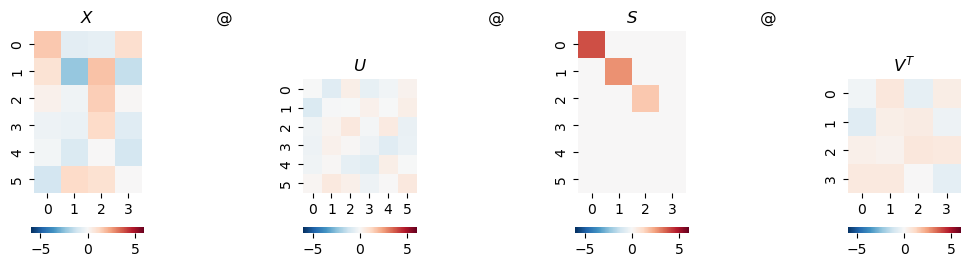

In [7]:
X, U, S, V = visualize_svd(X, '$X$', '$U$', '$S$', '$V^T$', fig_height=3)  # 对X进行SVD分解并可视化

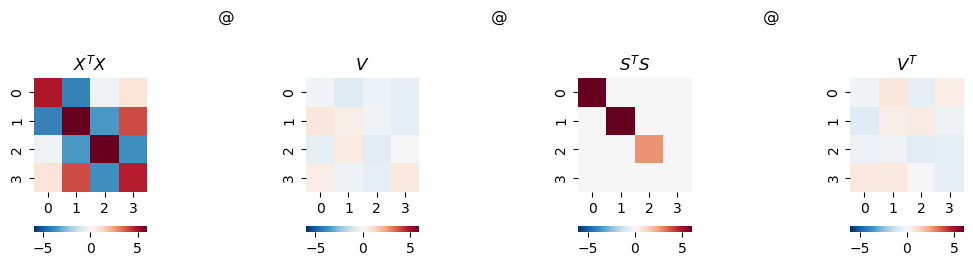

In [8]:
X_2, U_2, S_2, V_2 = visualize_svd(X.T @ X, '$X^TX$', '$V$', '$S^TS$', '$V^T$', fig_height=3)  # 对X^T X分解并可视化

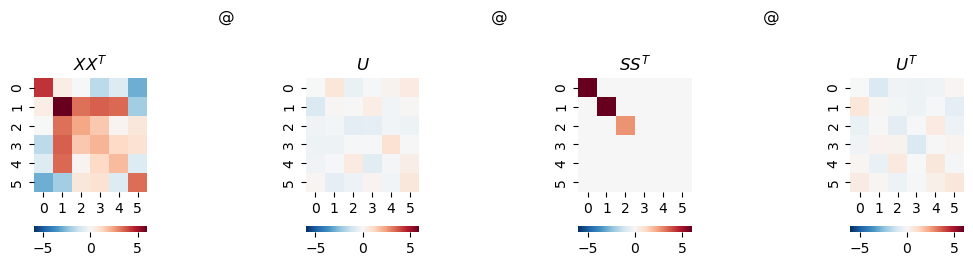

In [9]:
X_3, U_3, S_3, V_3 = visualize_svd(X @ X.T, '$XX^T$', '$U$', '$SS^T$', '$U^T$', fig_height=3)  # 对XX^T分解并可视化

## 验证U*U.T = I

In [10]:
all_max = 6  # 设置最大值
all_min = -6  # 设置最小值

Text(0.5, 1.0, '$I$')

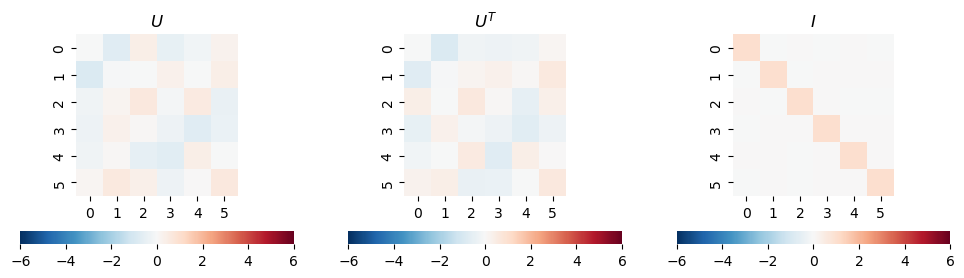

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建图表

plt.sca(axs[0])
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U矩阵
ax.set_aspect("equal")
plt.title('$U$')

plt.sca(axs[1])
ax = sns.heatmap(U.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U的转置
ax.set_aspect("equal")
plt.title('$U^T$')

plt.sca(axs[2])
ax = sns.heatmap(U @ U.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制单位矩阵I
ax.set_aspect("equal")
plt.title('$I$')

## 验证V*V.T = I

In [12]:
all_max = 6  # 设置最大值
all_min = -6  # 设置最小值

Text(0.5, 1.0, '$I$')

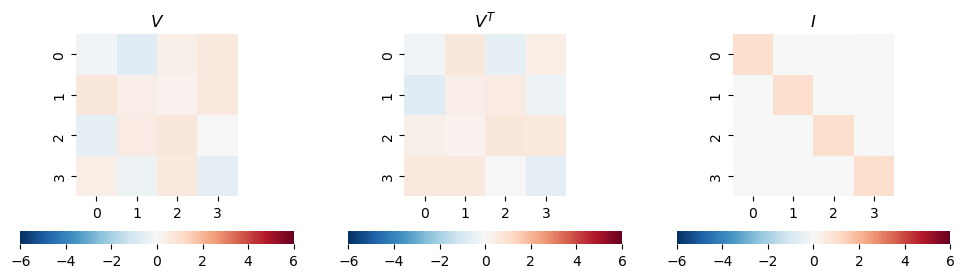

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建图表

plt.sca(axs[0])
ax = sns.heatmap(V, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制V矩阵
ax.set_aspect("equal")
plt.title('$V$')

plt.sca(axs[1])
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制V的转置
ax.set_aspect("equal")
plt.title('$V^T$')

plt.sca(axs[2])
ax = sns.heatmap(V @ V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制单位矩阵I
ax.set_aspect("equal")
plt.title('$I$')

## 奇异值矩阵分析

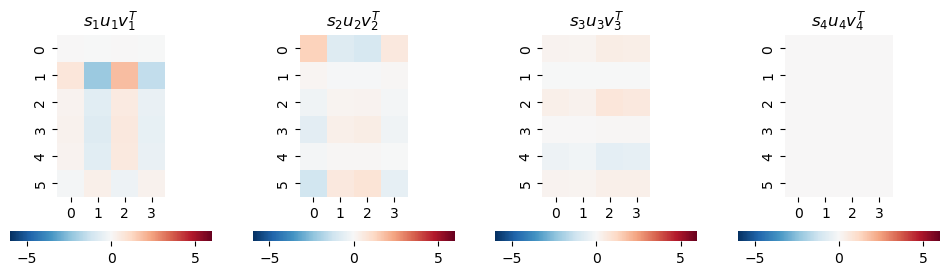

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建图表

for j in [0, 1, 2, 3]:
    X_j = S[j, j] * U[:, j][:, None] @ V[:, j][None, :]  # 构建单项分解矩阵
    plt.sca(axs[j])
    ax = sns.heatmap(X_j, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制矩阵
    ax.set_aspect("equal")
    title_txt = '$s_' + str(j + 1) + 'u_' + str(j + 1) + 'v_' + str(j + 1) + '^T$'
    plt.title(title_txt)

## 投影可视化

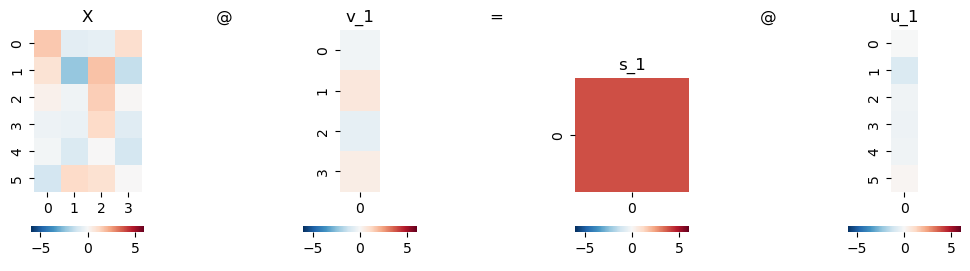

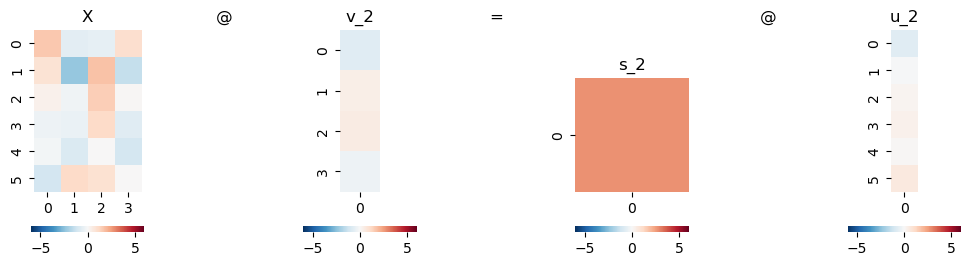

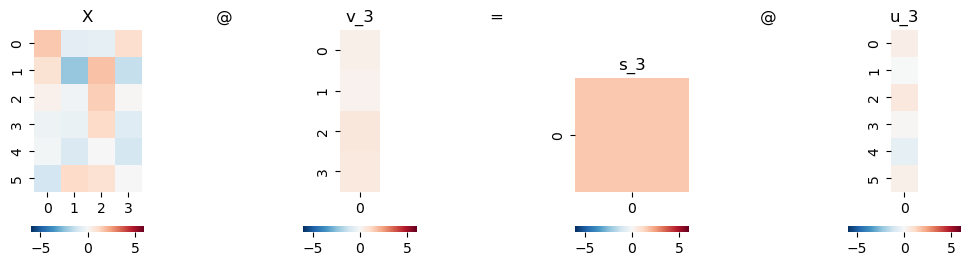

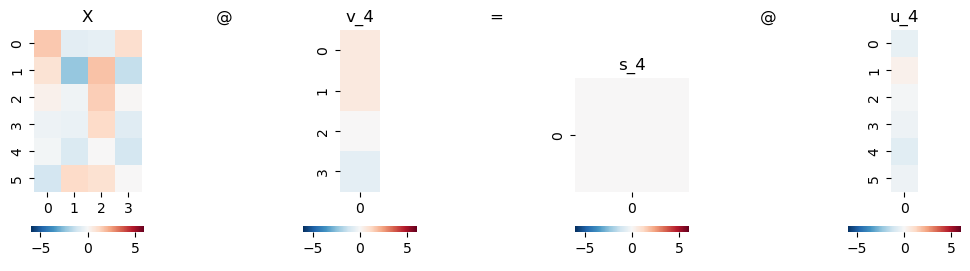

In [15]:
for j in [0, 1, 2, 3]:
    fig, axs = plt.subplots(1, 7, figsize=(12, 3))  # 创建图表
    
    v_j = V[:, j]
    v_j = np.matrix(v_j).T  # 转置v_j
    s_j = S[j, j]
    s_j = np.matrix(s_j)  # 转换为矩阵格式
    u_j = U[:, j]
    u_j = np.matrix(u_j).T  # 转置u_j
    
    plt.sca(axs[0])
    ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制X矩阵
    ax.set_aspect("equal")
    plt.title('X')
    
    plt.sca(axs[1])
    plt.title('@')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(v_j, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制v_j
    ax.set_aspect("equal")
    plt.title('v_' + str(j + 1))
    
    plt.sca(axs[3])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[4])
    ax = sns.heatmap(s_j, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制s_j
    ax.set_aspect("equal")
    plt.title('s_' + str(j + 1))
    
    plt.sca(axs[5])
    plt.title('@')
    plt.axis('off')
    
    plt.sca(axs[6])
    ax = sns.heatmap(u_j, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制u_j
    ax.set_aspect("equal")
    plt.title('u_' + str(j + 1))